# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Mendoza, Genesis Adam \
_Student No._: 2019-05415 \
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 23/02/2024 - 10:50 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** GENESIS ADAM D. MENDOZA

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

Initiate a seed so that the noise throughout the code is consistent. Define the starting point, the stopping point, and the number of points. From this, initiate an array of $x$ values. From these $x$ values, generate an array that takes each of the point in the $x$ array and maps them into a corresponding $y$ value. Add a random number from the normal distribution with mean $0$ and variance $0.1$.

In [2]:
np.random.seed(420) 

start = 0
stop = 3
n_points = 100

#Generate 100 points from 0 to 3, including the endpoints
x_points = np.linspace(start, stop, n_points) 
#Generate the noisy data through list comprehension by taking each value in x_points and calculating the corresponding y value with noise.
y_points = [point*np.sin(point) + np.random.normal(0,0.1)  for point in x_points] 

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*

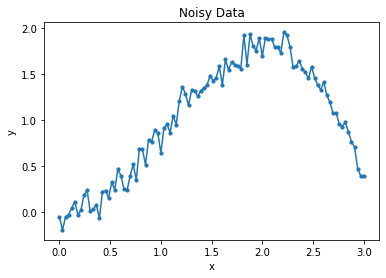

In [3]:
plt.xlabel('x') #set the x-axis label
plt.ylabel('y') #set the y-axis label
plt.title('Noisy Data')
plt.scatter(x_points, y_points, s = 10) #create a scatter plot of the data
plt.plot(x_points, y_points) #impose upon the scatter plot a lineplot
plt.show()

PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*


In [4]:
from sklearn.model_selection import train_test_split

#Split the whole data into 2 in order to get a 50% part for the training set and another 50% for the collective test and cross-validation set
x_train, x_split, y_train, y_split = train_test_split(x_points, y_points, train_size = 0.5, random_state = 0)
#Separate the test and cross-validation set to get 25% each
x_test, x_cv, y_test, y_cv = train_test_split(x_split, y_split, test_size = 0.5, random_state = 0)

2. Get the best-fit curve for polynomial degrees $d=0$ to $14$ for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*

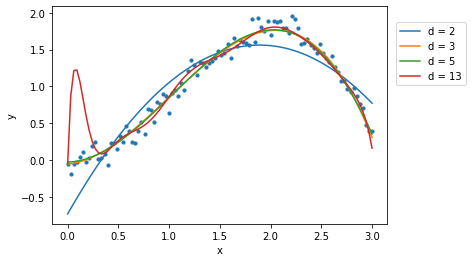

In [5]:
for n in [2,3,5,13]: #to iterate for polynomial degrees 2, 3, 5, and 13, just for illustration
    fit = np.polyfit(x_train, y_train, deg = n) #fit an n-degree polynomial with the training set and get the coefficients array in decreasing order
    x_train_fit = np.poly1d(fit) #transform the 'fit' array into a polynomial
    plt.plot(x_points, x_train_fit(x_points), label = 'd = '+str(n)) #plot the curve by inputting x_points into the x_train_fit polynomial.

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_points, y_points, s=10) #impose the scatter plot for reference
plt.legend(bbox_to_anchor=(1.25, 0.95), ncol=1)
plt.show()

3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*

Define the excluded end part of the list of polynomial degrees. Initiate the degree list for the purpose of plotting. Then, initiate empty arrays for the root-mean-square values of the cross-validation, training, and test set. Make a loop that iterates through each polynomial degree and calculates the root-mean-square error of the fitted values and its corresponding true values.

In [6]:
from sklearn.metrics import mean_squared_error

n_range = 15
deg = [*range(n_range)] #initialize the polynomial degrees for fitting
rms_cross_val = []
rms_train = []
rms_test = []

for n in deg:
    fit = np.polyfit(x_train, y_train, deg = n) #fit the polynomial to the training data
    x_train_fit = np.poly1d(fit) # creates the function that takes an x value and returns the corresponding value from the fitted polynomial
    rms_cross_val.append(np.sqrt(mean_squared_error(y_cv, x_train_fit(x_cv)))) #return the rms between actual y_cv and predicted y_cv
    rms_train.append(np.sqrt(mean_squared_error(y_train, x_train_fit(x_train)))) #return the rms between actual y_train and predicted y_train
    rms_test.append(np.sqrt(mean_squared_error(y_test, x_train_fit(x_test)))) #return the rms between actual y_train and predicted y_train

print('root mean square error for the cross validation set:')
print(rms_cross_val)
print('root mean square error for the training data:')
print(rms_train)

root mean square error for the cross validation set:
[0.6771382374392669, 0.49360389356184575, 0.28417902561346386, 0.10914080241680899, 0.11015323110283555, 0.1087935876349695, 0.10958786357990966, 0.10982224428856564, 0.12279098797386896, 0.1173323159371405, 0.1159481496244301, 0.12341279308898512, 0.3013349052414909, 0.4024737939227979, 1.3578486411540553]
root mean square error for the training data:
[0.5687217360782665, 0.46054855602105366, 0.21341057462111343, 0.08233985339816571, 0.08149337162337122, 0.08130982113778391, 0.08126535958668336, 0.08098704877227338, 0.0771548232467626, 0.07526728642456373, 0.07508058715080616, 0.0742137696083475, 0.07123876016785174, 0.07092111256436431, 0.06460744913438311]


4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*

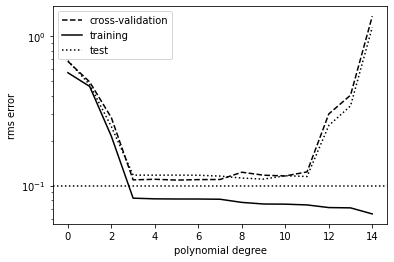

In [7]:
plt.xlabel('polynomial degree')
plt.ylabel('rms error')
plt.yscale('log')
plt.plot(deg, rms_cross_val, 'k--', label = 'cross-validation')
plt.plot(deg, rms_train, 'k', label = 'training') 
plt.plot(deg, rms_test, 'k:', label = 'test')
plt.axhline(y = 0.1, color = 'k', linestyle = ':') 
plt.legend(loc = 'upper left')
plt.show()

As we can see, the rms error of the training data and the polynomial fitted to it decreases as the degree increases. Increasing the polynomial degree allows the curve-fitting to be more flexible so it has more freedom with minimizing the error. This will be problematic at some point since the increased flexibility allows the noise to also be fitted. We call this situation **overfitting**. This is apparent in the plot above where we have imposed the root-mean-squared error of the never-before-seen data, the validation and the test set, with the trained polynomial fit. The overfitting regime is at the right side of the minima of the error curve where the error increases again. 

## Polynomial Regression from Scratch

Suppose we have a data points, $x_i$ and $y_i$, and we want to find the least-squares polynomial fit for these points. We have an n-degree polynomial of the form

\begin{align}
y_i=a_0+a_1x_i+a_2x_i^2+\cdots+a_nx_i^n\nonumber
\end{align}

The squared error of this polynomial fit is given by 

\begin{align}
E = \sum_{i=0}^n \left(y_i-a_0-a_1x_i-a_2x_i^2-\cdots-a_nx_i^n\right)^2\nonumber
\end{align}

and the optimal $a_i$ can be obtained by minimizing $E$ for each parameter. For example,

\begin{align}
\frac{\partial E}{\partial a_0}&=-2\sum_{i=0}^n \left(y_i-a_0-a_1x_i-a_2x_i^2-\cdots-a_nx_i^n\right)\nonumber,\\
\frac{\partial E}{\partial a_1}&=-2\sum_{i=0}^n x_i \left(y_i-a_0-a_1x_i-a_2x_i^2-\cdots-a_nx_i^n\right)\nonumber,\\
\frac{\partial E}{\partial a_2}&=-2\sum_{i=0}^n x_i^2 \left(y_i-a_0-a_1x_i-a_2x_i^2-\cdots-a_nx_i^n\right)\nonumber,\\
&\ \ \vdots\nonumber\\
\frac{\partial E}{\partial a_n}&=-2\sum_{i=0}^n x_i^n \left(y_i-a_0-a_1x_i-a_2x_i^2-\cdots-a_nx_i^n\right)\nonumber.
\end{align}

If we equate each of these to $0$, we will get a matrix

$$
\begin{bmatrix}
n & \sum_{i=0}^n x_i & \sum_{i=0}^n x_i^2 & \cdots & \sum_{i=0}^n x_i^n \\
\sum_{i=0}^n x_i & \sum_{i=0}^n x_i^2 & \sum_{i=0}^n x_i^3 & \cdots & \sum_{i=0}^n x_i^{n+1} \\
\sum_{i=0}^n x_i^2 & \sum_{i=0}^n x_i^3 & \sum_{i=0}^n x_i^4 & \cdots & \sum_{i=0}^n x_i^{n+2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum_{i=0}^n x_i^n & \sum_{i=0}^n x_i^{n+1} & \sum_{i=0}^n x_i^{n+2} & \cdots & \sum_{i=0}^n x_i^{n+n}
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
\vdots \\
a_n
\end{bmatrix}
=
\begin{bmatrix}
\sum_{i=0}^n y_i \\
\sum_{i=0}^n x_i y_i \\
\sum_{i=0}^n x_i^2 y_i \\
\vdots \\
\sum_{i=0}^n x_i^n y_i 
\end{bmatrix}
$$
To get the coefficients, we'll just have to invert the $x$ matrix and multiply it to the $y$ matrix.

$$
\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
\vdots \\
a_n
\end{bmatrix}
=
\begin{bmatrix}
n & \sum_{i=0}^n x_i & \sum_{i=0}^n x_i^2 & \cdots & \sum_{i=0}^n x_i^n \\
\sum_{i=0}^n x_i & \sum_{i=0}^n x_i^2 & \sum_{i=0}^n x_i^3 & \cdots & \sum_{i=0}^n x_i^{n+1} \\
\sum_{i=0}^n x_i^2 & \sum_{i=0}^n x_i^3 & \sum_{i=0}^n x_i^4 & \cdots & \sum_{i=0}^n x_i^{n+2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum_{i=0}^n x_i^n & \sum_{i=0}^n x_i^{n+1} & \sum_{i=0}^n x_i^{n+2} & \cdots & \sum_{i=0}^n x_i^{n+n}
\end{bmatrix}^{-1}
\begin{bmatrix}
\sum_{i=0}^n y_i \\
\sum_{i=0}^n x_i y_i \\
\sum_{i=0}^n x_i^2 y_i \\
\vdots \\
\sum_{i=0}^n x_i^n y_i 
\end{bmatrix}
$$

In [8]:
def manual_polyfit(x_array, y_array, deg):

    x_mat = np.zeros((deg + 1, deg + 1)) #for an n-degree polynomial fit, we will initiate an n x n matrix full of zeroes.

    for i in range(deg+1):
        for j in range(deg+1):
            x_mat[i, j] = np.sum(np.power(x_array, i+j)) #fill with the appropriate values above

    inv_xmat = np.linalg.inv(x_mat) #invert the x_matrix

    y_mat = np.zeros(deg+1) #initiate a column with length n
    for i in range(deg+1):
        y_mat[i] = np.sum(np.power(x_array,i)*y_array) #fill with the appropriate values above

    coeff = np.dot(inv_xmat, y_mat) #solve for the coefficients

    y_pred = [sum(coeff[j] * (x_val ** j) for j in range(deg + 1)) for x_val in x_array] #calculate the y values of the fit

    return y_pred

Compare it with the plot taken from `fit_poly`?

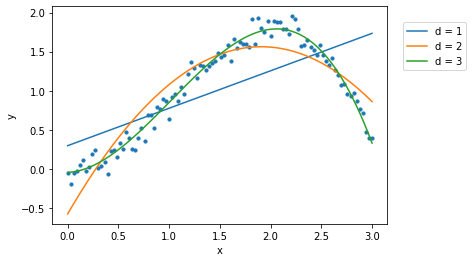

In [9]:
for n in [1,2,3]: #to iterate for polynomial degrees 2, 3, 5, and 13, just for illustration
    plt.plot(x_points, manual_polyfit(x_points, y_points, n), label = 'd = '+str(n)) 

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_points, y_points, s=10) #impose the scatter plot for reference
plt.legend(bbox_to_anchor=(1.25, 0.95), ncol=1)
plt.show()